### Imports and Libraries

In [86]:
import pandas as pd
import os
import sys
import ast
import geopandas as gpd
import numpy as np

# Add the src directory to the system path
sys.path.append(os.path.abspath('../src'))

from utils import *

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data exploration

In our project, we aim to explore the evolution of stereotypical gender personas over time. Before addressing our specific research questions, we recognize the importance of thoroughly understanding the dataset we’re working with. This initial exploratory phase serves several essential purposes:

1. Dataset Familiarization: Begin by examining the overall structure, types of variables, and categories within the data to gain a clear understanding of its scope and content.

2. Data Integrity Check: Evaluate the dataset for potential quality issues such as missing values, duplicates, and outliers, ensuring that the information is reliable and accurate for analysis.

3. Initial Insights: Explore patterns, distributions, and basic relationships within the data to reveal any trends, outliers, or unexpected characteristics that could shape further analysis.

4. Analytical Approach Selection: Use findings from the preliminary exploration to refine our methodological approach, identifying the most suitable tools and techniques for in depth analysis.

5. Hypothesis Discovery: Develop new questions or hypotheses based on early insights, potentially expanding the original focus of our research.

6. Dataset Preparation: Apply necessary data transformations and manipulations to prepare a clean, organized dataset ready for focused analysis.

In [52]:
# Loading the data using the according function for each file in utils.py
file_path = "../MovieSummaries"

print("Dataframes creation starting for CMU datasets...")

df_summaries = load_df_summaries(file_path)
df_movie_metadata = load_df_movies(file_path) 
df_character_metadata = load_df_characters(file_path) 
df_tvtropes_clusters = load_df_character_clusters(file_path) 

print("Dataframes creation for CMU datasets done.")

Dataframes creation starting for CMU datasets...
Dataframes creation for CMU datasets done.


## 1.1 Visualization in order to understand the data

### 1.1 Visualization of each dataframe and size of each dataframe

In [53]:
df_summaries.head()

,wiki_movie_id,summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [54]:
df_movie_metadata.head()

,wiki_movie_id,freebase_movie_id,title,release_date,box_office,runtime,languages,countries,genres,Movie_release_date
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"[Thriller, Science Fiction, Horror, Adventure,...",2001-08-24
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"[Mystery, Biographical film, Drama, Crime Drama]",2000-02-16
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"[Crime Fiction, Drama]",NaT
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"[Thriller, Erotic thriller, Psychological thri...",NaT
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,[Drama],NaT


In [55]:
df_character_metadata.head()

,wiki_movie_id,freebase_movie_id,release_date,character_name,birth_date,gender,height,ethnicity,actor_name,age_at_release,freebase_map_id,freebase_character_id,freebase_actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [56]:
df_tvtropes_clusters.head()

,cluster,character_name,movie_title,freebase_map_id,actor_name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [98]:
# Size of the df_character_metadata
characters_df_size=len(df_character_metadata)
print(f'The size of the characters_df is: {characters_df_size}')

# Size of the df_movie_metadata
movies_df_size=len(df_movie_metadata)
print(f'The size of the movies_df is: {movies_df_size}')

# Size of the summaries df
summaries_df_size=len(df_summaries)
print(f'The size of the summaries_df is: {summaries_df_size}')

# Size of the tv_tropes_df
tv_tropes_df_size=len(df_tvtropes_clusters)
print(f'The size of the tv_tropes_df is: {tv_tropes_df_size}')

The size of the characters_df is: 450669
The size of the movies_df is: 81741
The size of the summaries_df is: 42303
The size of the tv_tropes_df is: 501


### 1.2 General exploration of genders' representation in movies

In [58]:
# Check how many characters do not have specified gender
df_character_metadata['gender'].isna().value_counts()

gender
False    405060
True      45609
Name: count, dtype: int64

It seems like a little over 10% of the characters given, do not have a specified gender. As it is not a big percentage, we will continue our analysis with the characters with a specified gender.

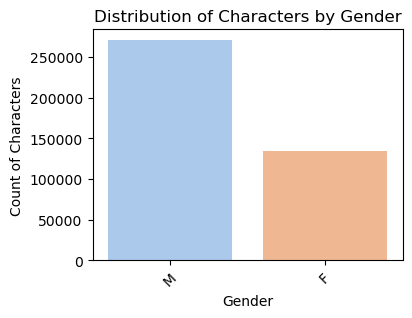

In [59]:
# Count of characters by gender
gender_counts = df_character_metadata['gender'].value_counts()

# Visualization of Gender Distribution
plt.figure(figsize=(4, 3))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='pastel', hue=gender_counts.index, legend=False)
plt.title('Distribution of Characters by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Characters')
plt.xticks(rotation=45)
plt.show()

In [60]:
# Percentage Representation of Female Characters
total_characters = gender_counts.sum()
female_count = gender_counts.get('F', 0)
male_count = gender_counts.get('M', 0)

female_percentage = (female_count / (male_count + female_count)) * 100
male_percentage = (male_count / (male_count + female_count)) * 100

print(f"Female characters: {female_percentage:.2f}%")
print(f"Male characters: {male_percentage:.2f}%")

Female characters: 33.28%
Male characters: 66.72%


As expected, male characters surpass the amount of female characters. This is a first sign of the stronger representation of males in movies.

### 1.3 Difference in males VS. females representation, across time (decades)

In [61]:
df_movie_metadata.head()

,wiki_movie_id,freebase_movie_id,title,release_date,box_office,runtime,languages,countries,genres,Movie_release_date
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"[Thriller, Science Fiction, Horror, Adventure,...",2001-08-24
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"[Mystery, Biographical film, Drama, Crime Drama]",2000-02-16
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"[Crime Fiction, Drama]",NaT
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"[Thriller, Erotic thriller, Psychological thri...",NaT
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,[Drama],NaT


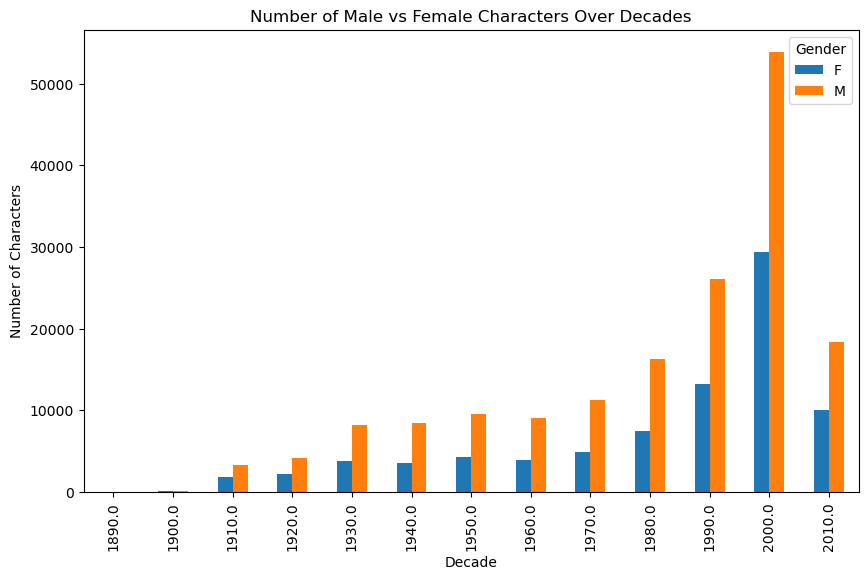

In [62]:
# Extracting the decade
df_character_metadata['decade'] = (df_character_metadata['release_date'].dt.year // 10) * 10

# Counting males and females per decade
gender_counts = df_character_metadata.groupby(['decade', 'gender']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar', stacked=False, ax=plt.gca())
plt.title("Number of Male vs Female Characters Over Decades")
plt.xlabel("Decade")
plt.ylabel("Number of Characters")
plt.legend(title="Gender")
plt.show()

It seems like the trend of higher male representation has not changed through the years, as shown in the plot above, the percentage of males seems to be pretty much double than the females' percentage.

### 1.4 Gender representation across countries

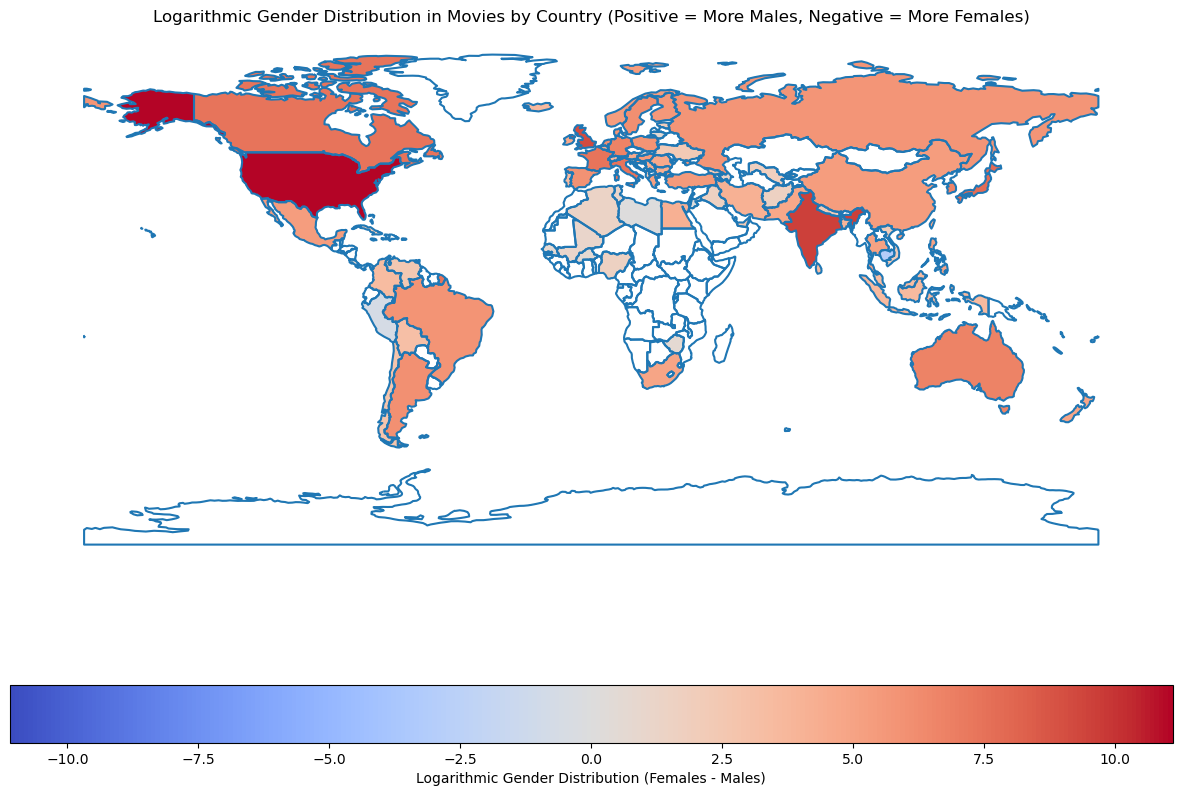

In [88]:
# Merge DataFrames on 'wiki_movie_id'
merged_df = df_movie_metadata.merge(df_character_metadata, on="wiki_movie_id", how="inner")

# Count the gender representation acorss countries
gender_counts = merged_df.groupby(['countries', 'gender']).size().unstack(fill_value=0)
gender_counts.columns = ['F', 'M']
gender_counts['Difference'] = gender_counts['M'] - gender_counts['F']  # Positive if more males, negative if more females
gender_counts.reset_index(inplace=True)

# Load the world shapefile
shapefile_path = '../data/ne_110m_admin_0_countries.shp'  # Adjust this path based on folder structure
world = gpd.read_file(shapefile_path)

world = world.merge(gender_counts, how='left', left_on='NAME', right_on='countries')

# Apply logarithmic transformation to the absolute value of `Difference`
world['Log_Difference'] = np.sign(world['Difference']) * np.log1p(world['Difference'].abs())

# Set up symmetrical limits based on the transformed values
max_abs_log_diff = world['Log_Difference'].abs().max()

# Plot the transformed `Log_Difference` values
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)

world.plot(column='Log_Difference', cmap='coolwarm', ax=ax, legend=True,
           vmin=-max_abs_log_diff, vmax=max_abs_log_diff,
           legend_kwds={'label': "Logarithmic Gender Distribution (Females - Males)",
                        'orientation': "horizontal"},
           missing_kwds={'color': 'white'},  # Set missing data color to white
           linewidth=0.5, edgecolor='0.5')

plt.title('Logarithmic Gender Distribution in Movies by Country (Positive = More Males, Negative = More Females)')
plt.axis('off')
plt.show()

In [89]:
df_US = merged_df[merged_df['countries'] == "United States of America"]
print(f" {len(df_US)} out of the {len(merged_df)} characters come from movies in the United States of America.")

 203805 out of the 450669 characters come from movies in the United States of America.


In [94]:
df_Peru = gender_counts[gender_counts['countries'] == "Peru"]
print(df_Peru)

     countries   F   M  Difference
1022      Peru  11  10          -1


In [95]:
df_Libya = gender_counts[gender_counts['countries'] == "Libya"]
print(df_Libya)

    countries  F  M  Difference
934     Libya  4  4           0


As shown in the map above, all countries are visibly red (or close to red), which means that the percentage of men in higher than women's. Only a few countries such as Peru and Libya appear to have balanced amount of male and female characters.

Countries that are represented with white color, did not have any Movie characters associated with them.

Almost half of the characters come from movies in the USA, that's why we transformed the Difference of Male and Female Character to a logarithmic scale in order to be able to visualize clearly which gender dominates in each country.

### 1.5 Visualization of genders across movie genres

<Figure size 1200x800 with 0 Axes>

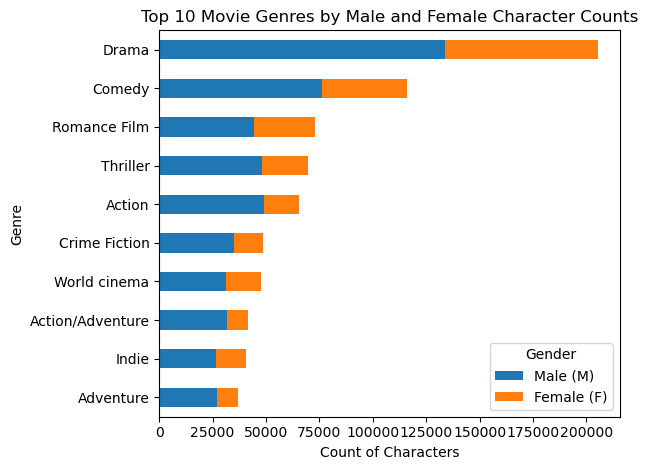

In [67]:
merged_df = df_movie_metadata.explode('genres').merge(
    df_character_metadata,
    on='wiki_movie_id',
    how='inner'
)

# Count characters by genre and gender
gender_genre_counts = merged_df.groupby(['genres', 'gender']).size().unstack(fill_value=0)

gender_genre_counts['Total'] = gender_genre_counts.sum(axis=1)
top_genres = gender_genre_counts.sort_values(by='Total', ascending=False).head(10)  # Get top 10 genres

top_genres = top_genres[::-1]

# Plotting the top genres
plt.figure(figsize=(12, 8))
top_genres[['M', 'F']].plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'])  # Males and Females colors
plt.title('Top 10 Movie Genres by Male and Female Character Counts')
plt.xlabel('Count of Characters')
plt.ylabel('Genre')
plt.legend(title='Gender', labels=['Male (M)', 'Female (F)'])
plt.tight_layout()
plt.show()

### 1.6 Clusters that characters were assigned to

In [97]:
merged_df1 = pd.merge(df_tvtropes_clusters, df_character_metadata, how = "left", left_on = "freebase_map_id", right_on="freebase_map_id")

<Figure size 1200x800 with 0 Axes>

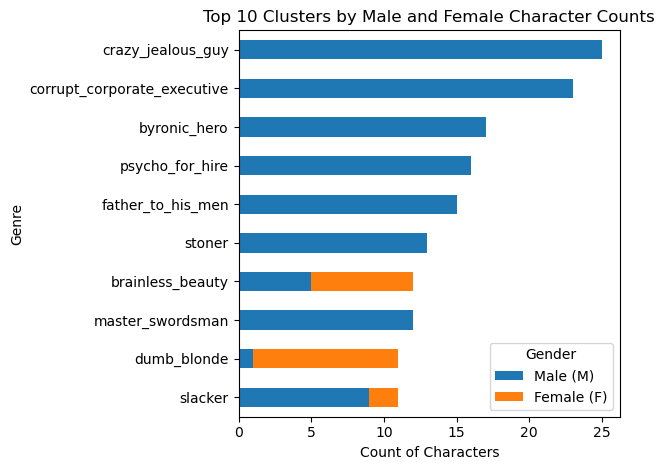

In [69]:
gender_cluster_counts = merged_df1.groupby(['cluster', 'gender']).size().unstack(fill_value=0)

gender_cluster_counts['Total'] = gender_cluster_counts.sum(axis=1)
top_clusters = gender_cluster_counts.sort_values(by='Total', ascending=False).head(10)  # Get top 10 genres

top_clusters = top_clusters[::-1]

# Plotting the top clusters
plt.figure(figsize=(12, 8))
top_clusters[['M', 'F']].plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Top 10 Clusters by Male and Female Character Counts')
plt.xlabel('Count of Characters')
plt.ylabel('Genre')
plt.legend(title='Gender', labels=['Male (M)', 'Female (F)'])
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

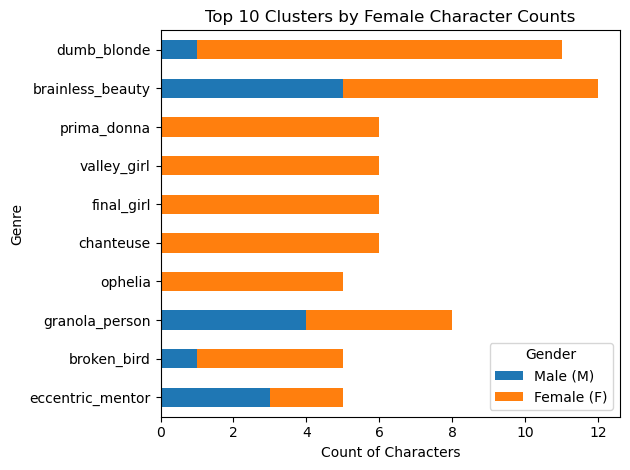

In [70]:
gender_cluster_counts = merged_df1.groupby(['cluster', 'gender']).size().unstack(fill_value=0)

top_clusters = gender_cluster_counts.sort_values(by='F', ascending=False).head(10)  # Get top 10 genres

top_clusters = top_clusters[::-1]

# Plotting the top genres
plt.figure(figsize=(12, 8))
top_clusters[['M', 'F']].plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Top 10 Clusters by Female Character Counts')
plt.xlabel('Count of Characters')
plt.ylabel('Genre')
plt.legend(title='Gender', labels=['Male (M)', 'Female (F)'])
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

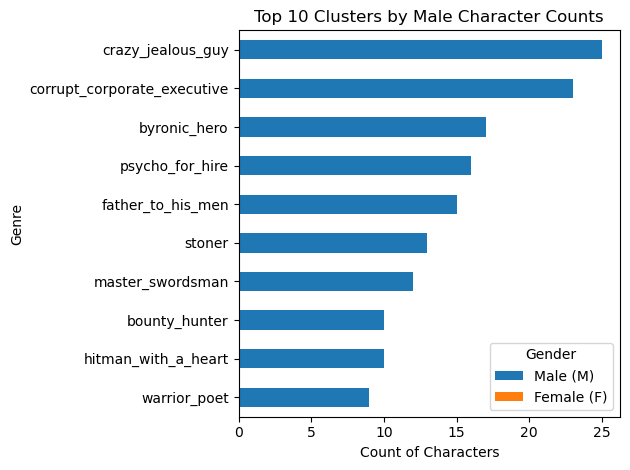

In [96]:
gender_cluster_counts = merged_df1.groupby(['cluster', 'gender']).size().unstack(fill_value=0)

top_clusters = gender_cluster_counts.sort_values(by='M', ascending=False).head(10)  # Get top 10 genres

top_clusters = top_clusters[::-1]

# Plotting the top genres
plt.figure(figsize=(12, 8))
top_clusters[['M', 'F']].plot(kind='barh', stacked=True, color=['#1f77b4', '#ff7f0e'])
plt.title('Top 10 Clusters by Male Character Counts')
plt.xlabel('Count of Characters')
plt.ylabel('Genre')
plt.legend(title='Gender', labels=['Male (M)', 'Female (F)'])
plt.tight_layout()
plt.show()

Just by plotting the top-clusters of each gender we can detect stereotypical adjectives and characterizations such as: 

Females:
- dumb
- blonde
- eccentric
- brainless
- beauty


Males:
- warrior
- hero
- hitman

## 2 Sentiment Analysis

### 2.1 Examination of plot summaries

Text size is important in sentiment analysis, as it influences the model's ability to capture sentiment accurately. Tailoring our approach based on text length, such as using segment-based analysis for longer texts or carefully selecting models, can lead to more reliable sentiment results.

count    42303.000000
mean       310.740468
std        318.338286
min          4.000000
25%         87.000000
50%        187.000000
75%        454.000000
max       4929.000000
Name: word_count, dtype: float64


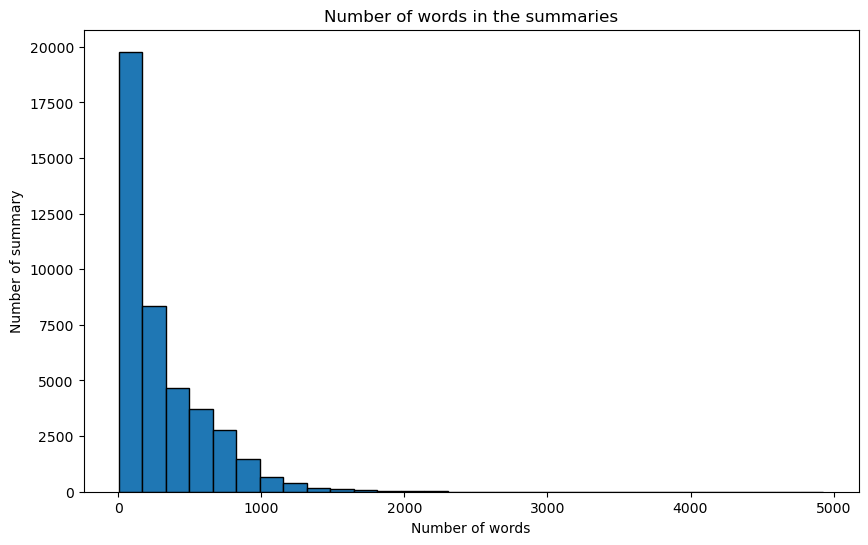

In [101]:
# Add a new column with the number of words for each summary
df_summaries['word_count'] = df_summaries['summary'].apply(lambda x: len(str(x).split()))

# Calculate the descriptive statistics
plot_summary_stats = df_summaries['word_count'].describe()
print(plot_summary_stats)

plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_summaries['word_count'], bins=30, edgecolor='black')
plt.title('Number of words in the summaries')
plt.xlabel('Number of words')
plt.ylabel('Number of summary')
plt.show()

It seems like the distribution of the words in summaries is far from uniform, as the median is 187 and the mean is 310. The fact that the mean is so much higher than the median, shows that there are some summaries with a very large size which increase significantly the average size of the plots. This is also obvious by the standard deviation which is 318. This wide variation acorss the size of the plots should be taken into account in our analysis.